# Importing required dependencies/libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade scikit-learn

%matplotlib inline

# Reading Data

* We will read both test and train data and will create seperate data frames for each of them

In [45]:
train_data = pd.read_csv("trainset.csv")
test_data = pd.read_csv("testset.csv")

# Observing General Shape of the Data

In [46]:
print("Training Data Shape", train_data.shape)
print("Testing Data Shape :", test_data.shape)

Training Data Shape (29271, 15)
Testing Data Shape : (11917, 15)


# Getting Data Descriptionn
  * Data description helps us understand 5 number summary and other key statistical measures of our data
  * Remember this statistical summary is applied only to the numeric features in our data.

In [47]:
train_data.describe()

,age,duration,campaign,pdays,nr.employed
count,29271.000000,29271.000000,29271.000000,29271.000000,29271.000000
mean,40.126132,266.334973,2.737556,988.235455,5205.364012
std,9.522742,272.826726,3.085469,102.879851,36.306531
min,17.000000,0.000000,1.000000,0.000000,5017.500000
25%,32.000000,103.000000,1.000000,999.000000,5191.000000
50%,39.000000,179.000000,2.000000,999.000000,5228.100000
75%,47.000000,327.000000,3.000000,999.000000,5228.100000
max,88.000000,4918.000000,56.000000,999.000000,5228.100000


# Observing initial 5 records of Training Data

In [48]:
train_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,blue-collar,divorced,basic.4y,yes,no,telephone,may,mon,1575,1,999,nonexistent,5191.0,yes
1,49,entrepreneur,married,university.degree,yes,no,telephone,may,mon,1042,1,999,nonexistent,5191.0,yes
2,49,technician,married,basic.9y,no,no,telephone,may,mon,1467,1,999,nonexistent,5191.0,yes
3,41,technician,married,professional.course,yes,no,telephone,may,mon,579,1,999,nonexistent,5191.0,yes
4,45,blue-collar,married,basic.9y,yes,no,telephone,may,mon,461,1,999,nonexistent,5191.0,yes


# Observing initial 5 records of Test Data

In [49]:
test_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,retired,married,university.degree,no,no,cellular,oct,fri,717,2,999,nonexistent,5017.5,yes
1,49,admin.,single,high.school,yes,no,cellular,oct,fri,136,2,999,nonexistent,5017.5,yes
2,36,admin.,married,university.degree,no,no,cellular,oct,fri,342,1,999,failure,5017.5,yes
3,70,retired,married,basic.4y,yes,no,cellular,oct,mon,131,1,999,nonexistent,5017.5,yes
4,60,retired,married,basic.4y,no,no,cellular,oct,mon,98,1,999,nonexistent,5017.5,yes


* Following are the key steps of EDA
  1. Remove/Fill Null Values
  2. Remove Duplicates
  3. Remove or Detect Outliers if and when required
  4. Checking if the data is balanced or not?

* We will do all of this on training data as this will be the chunk where we will train our model. Thus it will require the most cleaned and scaled form of data.

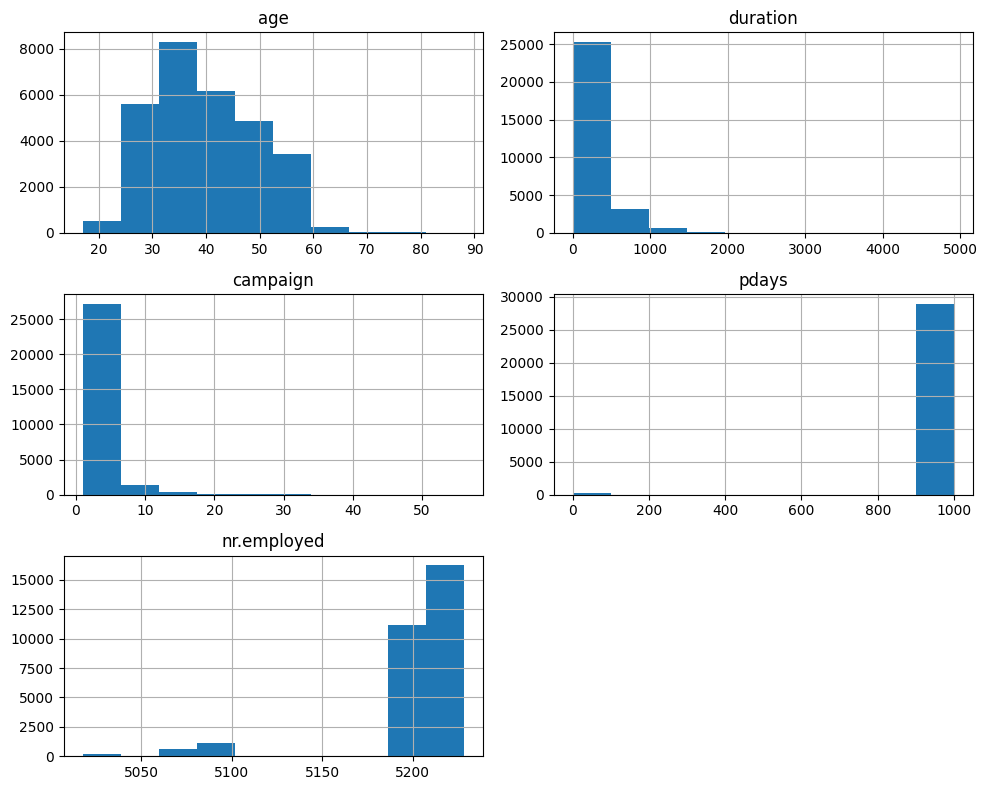

In [50]:
# Histogram for numerical attributes
numerical_attributes = ['age', 'duration', 'campaign', 'pdays', 'nr.employed']
train_data[numerical_attributes].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

1. Null Values Check
  * In our case there were no null values.

In [51]:
train_data.isnull().any().any()

False

2. Duplicate Check:
  * In this case there were a few duplicate records so we dropped them.


In [52]:
duplicates = train_data.duplicated()
print('Duplicates in original data : ', duplicates.any())
train_data.drop_duplicates(inplace=True)
# reset indices after dropping rows
df=train_data.reset_index(drop=True)
print('Duplicates nowes : ', df.duplicated().any())

Duplicates in original data :  True
Duplicates nowes :  False


3. Outlier Check:
  * Observing any Outliers in the numeric features
  * Here we can observe that age has various outliers as the 5 number summary considers age up to 70 as upper-bound (max). But, logically it makes sense for humans to be 100 years old. So 98 years customers makes sense and we will not consider them as outlier on the basis of their age

  * Same goes with call durations in seconds as some people do like to talk in detail. so can take fair amount of time on phone calls. Again logically we will consider them as normal values and not outliers.

  * In nr.employed we got no outliers.

  * The only features with actual outliers that do bother us is campaign.
  
  * For a ML model to get trained well we need to remove outlier to avoid "Garbage In Garbage Out" situation.


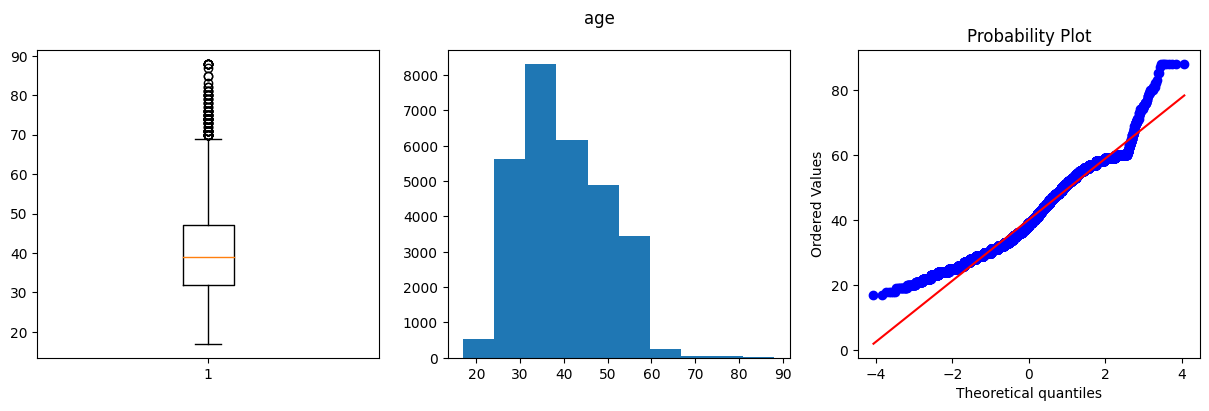

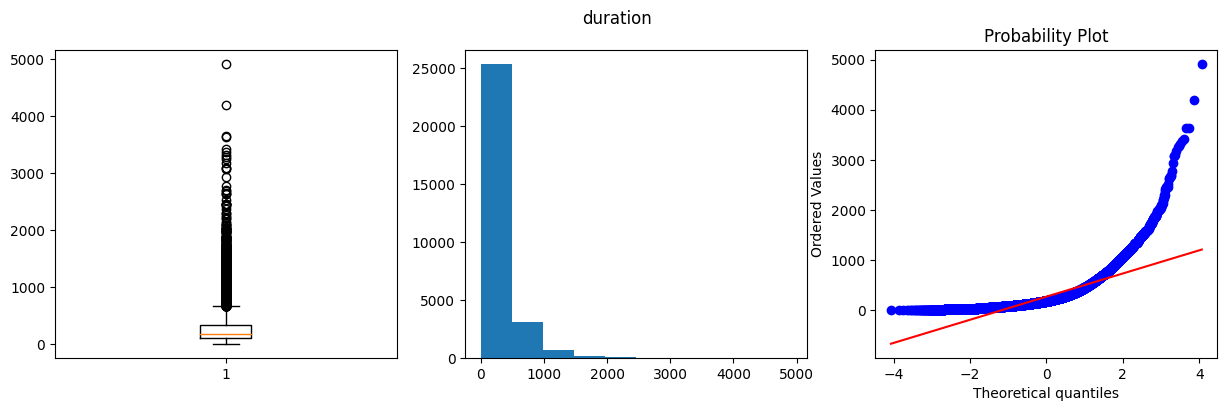

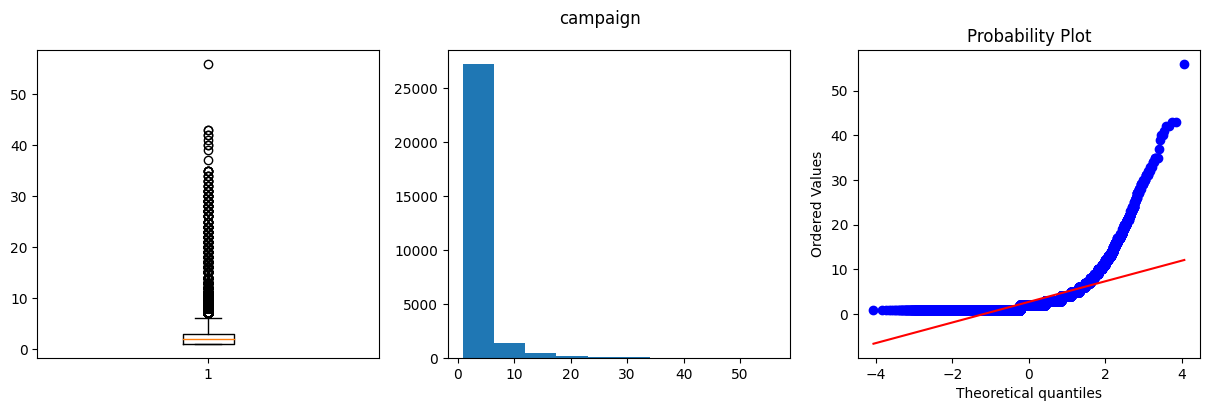

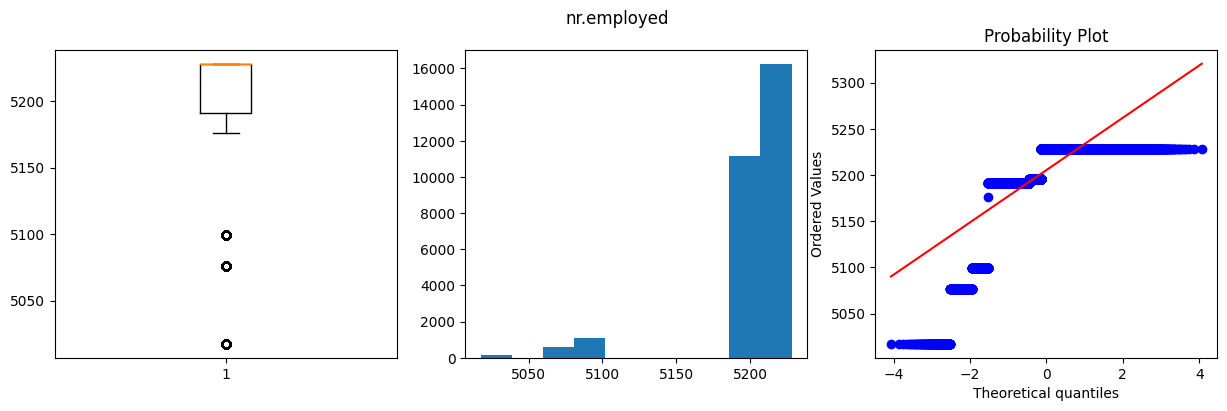

In [53]:
import scipy.stats as stats
cols = ['age', 'duration', 'campaign', 'nr.employed']
for col in cols:
    fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(15, 4))
    fig.suptitle(col)
    axes[0].boxplot(df[col])
    axes[1].hist(df[col])
    stats.probplot(df[col], dist='norm', plot=axes[2])
    plt.show()

Before Shape: (29260, 15)
After Shape: (28239, 15)


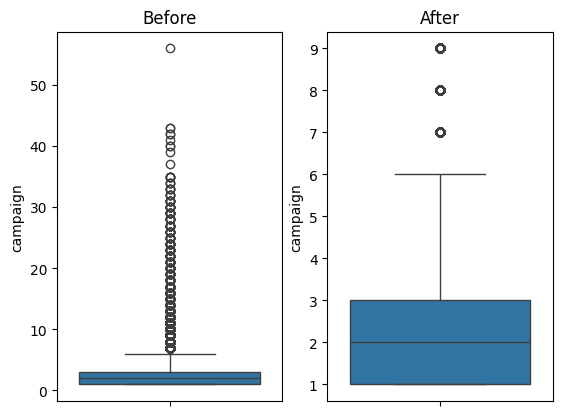

In [54]:
# remove outlier of campaign
fig, axes = plt.subplots(1,2)
df2 = train_data
col='campaign'
print("Before Shape:",df2.shape)
axes[0].title.set_text("Before")
sns.boxplot(df2[col],orient='v',ax=axes[0])
# Removing campaign above 50
df2 = df2[ (df2[col]<10)]
print("After Shape:",df2.shape)
axes[1].title.set_text("After")
sns.boxplot(df2[col],orient='v',ax=axes[1])
df=df2;
plt.show()
# reset indices after dropping rows
train_data=train_data.reset_index(drop=True)

In [55]:
train_data.shape

(29260, 15)

# Imbalance Data Check

* The most significant step in EDA is to check if the y-labels (class labels) are in balanced proportion or not.
* Speaking of the Binary Class labels like we have it is highly recommended to have balanced or almost balanced proportion of both the class labels. (50:50 or even 60:40 is fine)
* Also remember we will check imbalance of training data as once our model is trained it is good to predict any other data and test data imbalance will not count as model is not getting trained on that data
* Lets check if the data under observation is balanced or not?

Class 0: 26065
Class 1: 3195
Proportion of class 0 is  89.08 %
Proportion of class 1 is  10.92 %


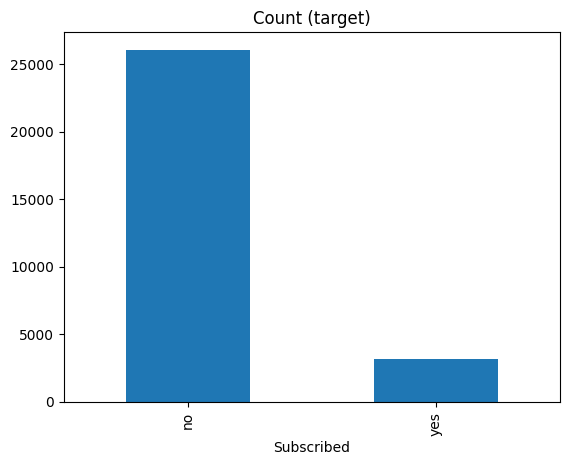

In [56]:
target_count = train_data ['Subscribed'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

# Takeaway:
  * This data is highly imbalanced/skewed.
  * Training our model on such data will have great chances of getting a biased model as it will over-fit on majority class label (No) and under-fit on minority class label (Yes)
  * It is important to address this before proceeding to the model.

# Handling Imbalanced Data:
  * Handling an imbalanced data is a 2 step process
    
    1. Converting all non-numeric data into numeric. As we have categories so we can do so by by converting all the data into numeric categories. We can do so manually which is not recommended at all or can convert categories into code using sckitlearn which is the approach we will follow.

    2. Handle the missing values.

* Now we will bring all the data in right format (i.e. Numeric format); the reason is machines understand numbers. This is why ML models need numeric data.
* To do so we can perform following steps.
  1. Find the features which are non-numeric.
  2. Convert each non-numeric category into numerically coded category.

1. Find the features which are non-numeric.

In [57]:
cat_features = train_data.select_dtypes(include = object)
print(cat_features.columns)
print()
print(cat_features.info())

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'Subscribed'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29260 entries, 0 to 29259
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          29260 non-null  object
 1   marital      29260 non-null  object
 2   education    29260 non-null  object
 3   housing      29260 non-null  object
 4   loan         29260 non-null  object
 5   contact      29260 non-null  object
 6   month        29260 non-null  object
 7   day_of_week  29260 non-null  object
 8   poutcome     29260 non-null  object
 9   Subscribed   29260 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB
None


2. Convert each non-numeric category into numerically coded category.

In [58]:
# Thus we can say that contact and Subscribed are 2 binary categoried features
# The remainning all have multiple categories
# As both test and train data are part of same data so it will also apply on train set too

bin_cat = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for cat in bin_cat:
    train_data[cat] = train_data[cat].astype('category')
    test_data[cat] = test_data[cat].astype('category')
    train_data[cat] = train_data[cat].cat.codes
    test_data[cat] = test_data[cat].cat.codes

# Ensure Subscribed remains unchanged
train_data['Subscribed'] = train_data['Subscribed'].astype('category')
test_data['Subscribed'] = test_data['Subscribed'].astype('category')

train_data.head()


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,41,1,0,0,2,0,1,6,1,1575,1,999,1,5191.0,yes
1,49,2,1,6,2,0,1,6,1,1042,1,999,1,5191.0,yes
2,49,9,1,2,0,0,1,6,1,1467,1,999,1,5191.0,yes
3,41,9,1,5,2,0,1,6,1,579,1,999,1,5191.0,yes
4,45,1,1,2,2,0,1,6,1,461,1,999,1,5191.0,yes


In [59]:
test_data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,nr.employed,Subscribed
0,62,5,1,6,0,0,0,8,0,717,2,999,1,5017.5,yes
1,49,0,2,3,2,0,0,8,0,136,2,999,1,5017.5,yes
2,36,0,1,6,0,0,0,8,0,342,1,999,0,5017.5,yes
3,70,5,1,0,2,0,0,8,1,131,1,999,1,5017.5,yes
4,60,5,1,0,0,0,0,8,1,98,1,999,1,5017.5,yes


2. Handling Imbalanced Data

In [60]:
# *** Imbalance ***

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting Train data into Train-Test Split
x = train_data.drop('Subscribed',axis=1)
y = train_data['Subscribed']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# Using Satandard scalar to scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)

# transforming our data using standar-scalar
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [61]:
# viewing the data shape for x_train_scaled and y_train
print(y_train.shape,x_train_scaled.shape)

(20482,) (20482, 14)


In [63]:
from imblearn.combine import SMOTEENN
smth = SMOTEENN(sampling_strategy='all')
x_smth, y_smth = smth.fit_resample(x_train_scaled, y_train)

In [64]:
print(x_smth.shape,y_smth.shape)

(34821, 14) (34821,)


Class 0: 17959
Class 1: 16862
Proportion of class 0 is  51.58 %
Proportion of class 1 is  48.42 %


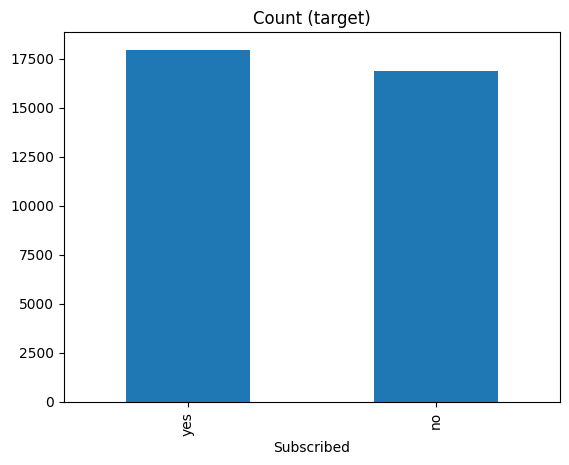

In [65]:
target_count = y_smth.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')
print('Proportion of class 1 is ', round(target_count[1] * 100 / (target_count[0] + target_count[1]), 2),'%')
target_count.plot(kind='bar', title='Count (target)');

In [66]:
target_count.head()

Subscribed
yes    17959
no     16862
Name: count, dtype: int64

# Takeaway:

* Now our data is both scaled as well as balanced

# Classification Model Implementation

  * We will implement following classification models
    1. Random forest
    2. Naive Bayes
    3. Decision Tree


In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# for data standardization and model evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Model-1: (Random Forest)

In [68]:
rf_model = RandomForestClassifier(n_estimators = 1000)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest:
              precision    recall  f1-score   support

          no       0.97      0.99      0.98      7823
         yes       0.88      0.72      0.79       955

    accuracy                           0.96      8778
   macro avg       0.92      0.85      0.88      8778
weighted avg       0.96      0.96      0.96      8778

Accuracy: 0.9583048530416951


# Model-2: (Naive Bays)

In [69]:
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)
y_pred_nb = nb_model.predict(x_test_scaled)
print("\nNaive Bayes (Gaussian):")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes (Gaussian):
              precision    recall  f1-score   support

          no       0.96      0.97      0.97      7823
         yes       0.73      0.70      0.71       955

    accuracy                           0.94      8778
   macro avg       0.85      0.83      0.84      8778
weighted avg       0.94      0.94      0.94      8778

Accuracy: 0.9388243335611757


# Model-3: (Decision Tree)

In [70]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(x_train, y_train)
y_pred_nb = decisionTree.predict(x_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Decision Tree Classifier:
              precision    recall  f1-score   support

          no       0.97      0.97      0.97      7823
         yes       0.74      0.75      0.75       955

    accuracy                           0.94      8778
   macro avg       0.86      0.86      0.86      8778
weighted avg       0.94      0.94      0.94      8778

Accuracy: 0.9442925495557074


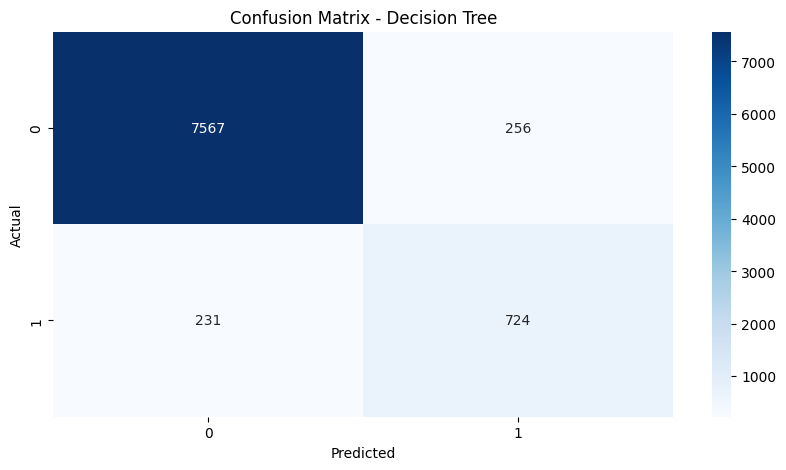

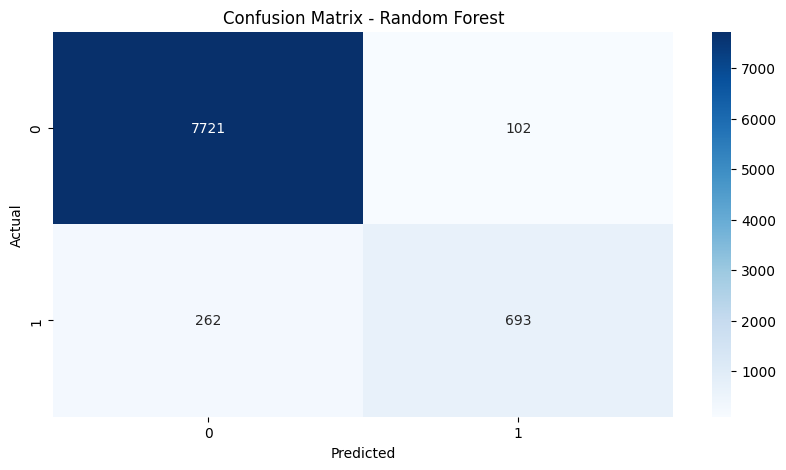

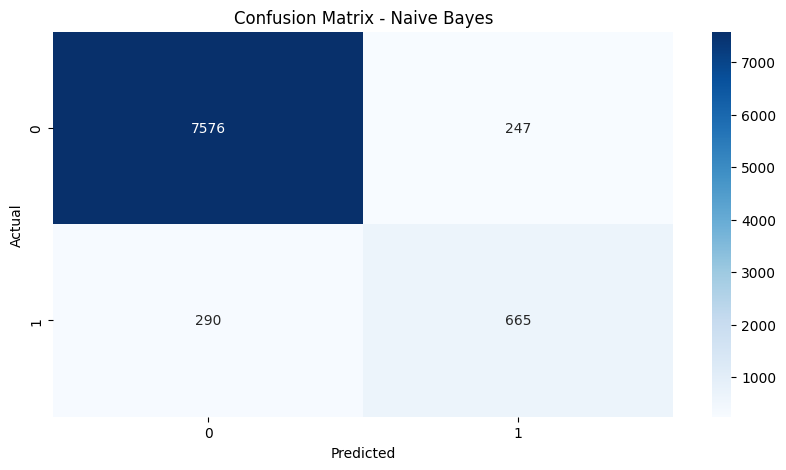

In [71]:
from sklearn.metrics import confusion_matrix
# Create a dictionary to store models and their names
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Loop through each model, train, predict, and compute confusion matrix
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(10, 5))
    sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Model Comparison

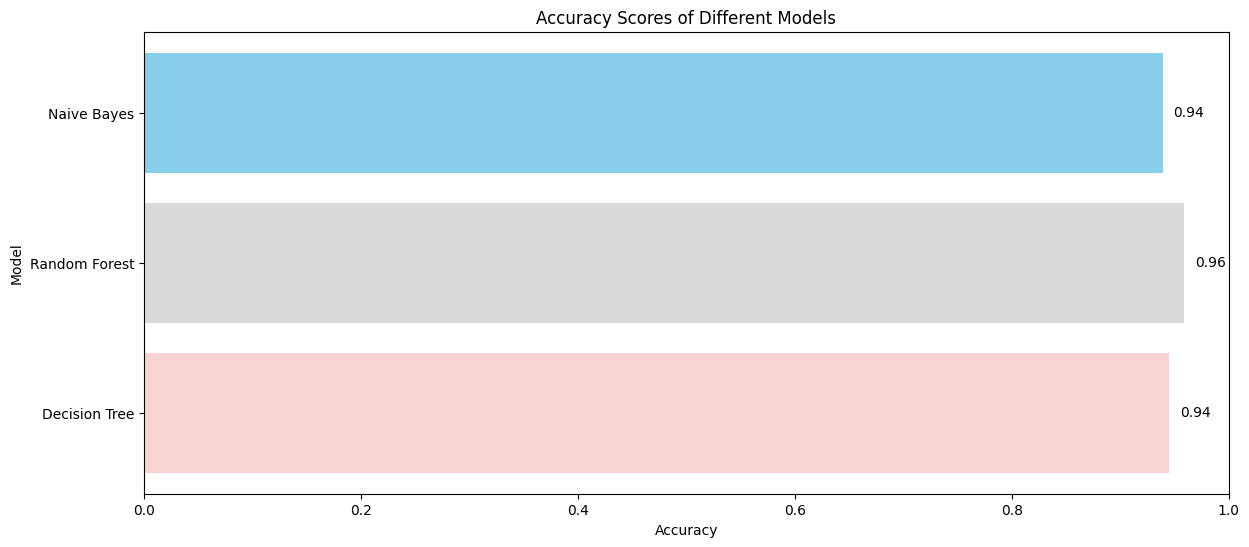

In [72]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),

}

# Initialize lists to store model names and accuracy scores
model_names = []
accuracy_scores = []

# Loop through each model, train, predict, and store accuracy
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    model_names.append(name)
    accuracy_scores.append(accuracy)

# Define colors for each bar
colors = ['#f9d3d3', '#d9d9d9', 'skyblue']
# colors = ['#b0d9e4', '#f4acb7', '#d0b3e3']
# colors = ['#c7e9b4', '#f9d3d3', '#d9d9d9']
# colors = ['#b0d9e4', '#f2ae72', '#d0b3e3']
# colors = ['#b0d9e4', '#f2ae72', '#f9d3d3']

# Plot the accuracy scores
plt.figure(figsize = (14, 6))
plt.barh(model_names, accuracy_scores, color = colors)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0, 1)  # Set x-axis limit to better visualize differences

# Label the accuracy scores on the bars
for i, acc in enumerate(accuracy_scores):
    plt.text(acc + 0.01, i, f'{acc:.2f}', va = 'center')

plt.show()

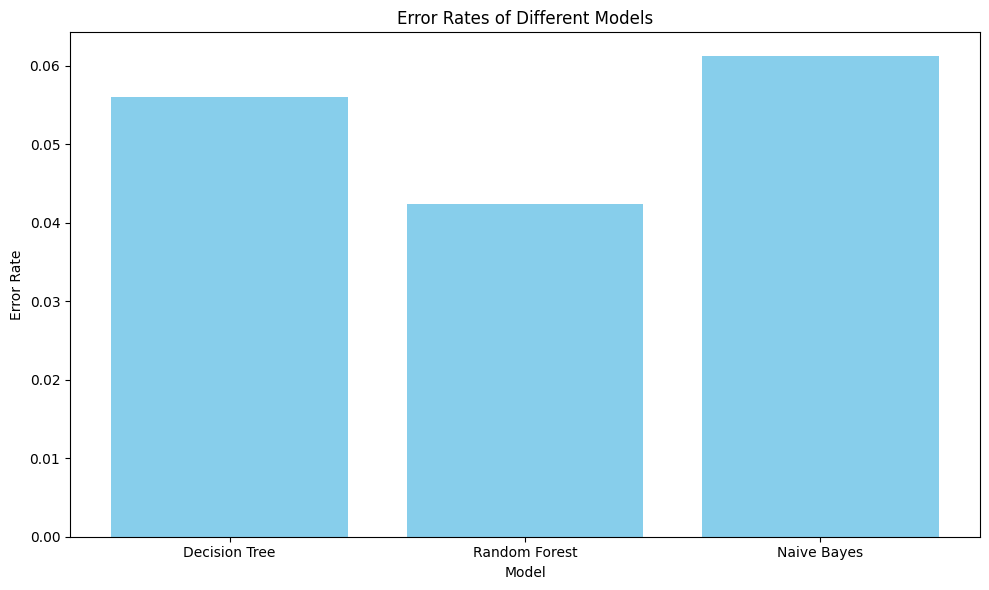

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Initialize lists to store model names and error rates
model_names = []
error_rates = []

# Loop through each model, train, predict, and store error rates
for name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)

    confusion_mat = confusion_matrix(y_test, y_pred)
    error_rate = 1 - np.trace(confusion_mat) / np.sum(confusion_mat)

    model_names.append(name)
    error_rates.append(error_rate)

# Plot error rates
plt.figure(figsize=(10, 6))

plt.bar(model_names, error_rates, color='skyblue')

plt.xlabel('Model')
plt.ylabel('Error Rate')
plt.title('Error Rates of Different Models')

plt.tight_layout()
plt.show()


# Takeaway:

* Random Forest has the highest accuracy of all the models.

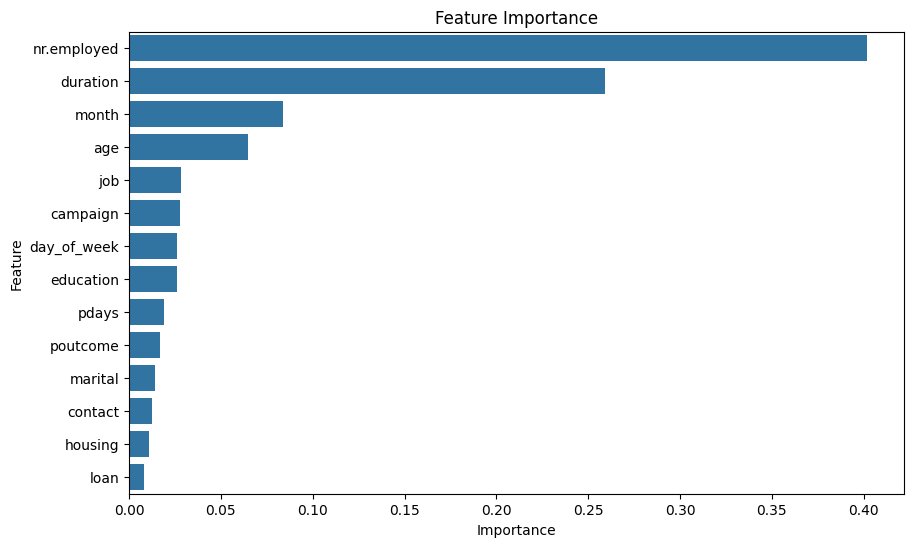

Top Features:
13    nr.employed
9        duration
7           month
0             age
Name: Feature, dtype: object


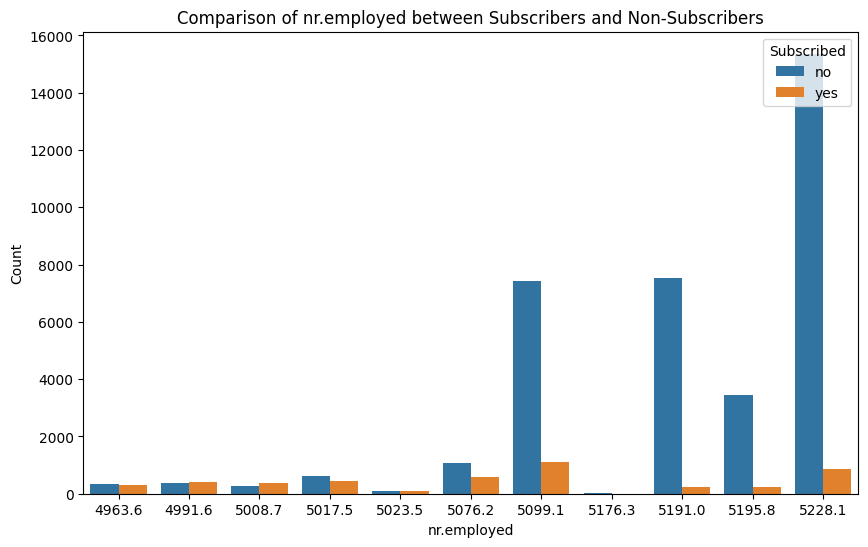


Statistics for nr.employed among Subscribers:
count    4639.000000
mean     5095.120069
std        87.581640
min      4963.600000
25%      5017.500000
50%      5099.100000
75%      5191.000000
max      5228.100000
Name: nr.employed, dtype: float64

Statistics for nr.employed among Non-Subscribers:
count    36538.000000
mean      5176.155301
std         64.576638
min       4963.600000
25%       5099.100000
50%       5195.800000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64



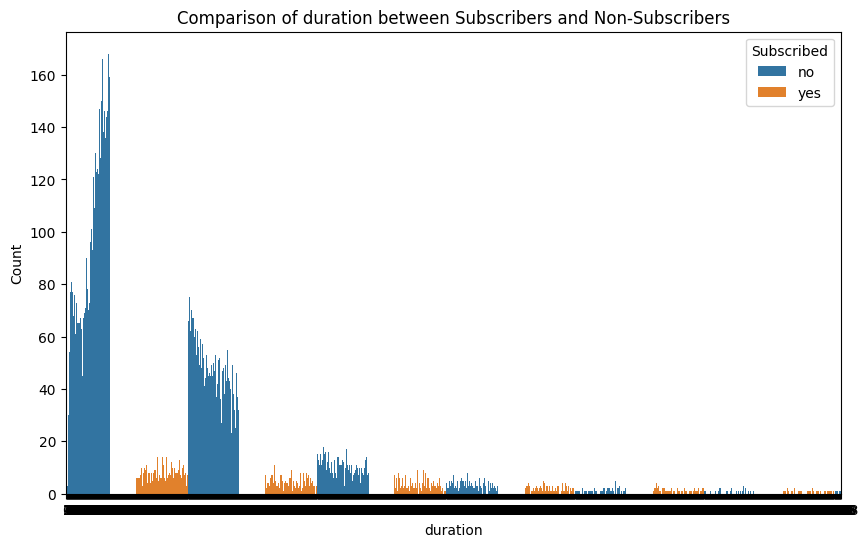


Statistics for duration among Subscribers:
count    4639.000000
mean      553.256090
std       401.190736
min        37.000000
25%       253.500000
50%       449.000000
75%       741.500000
max      4199.000000
Name: duration, dtype: float64

Statistics for duration among Non-Subscribers:
count    36538.000000
mean       220.872626
std        207.113631
min          0.000000
25%         95.000000
50%        164.000000
75%        279.000000
max       4918.000000
Name: duration, dtype: float64



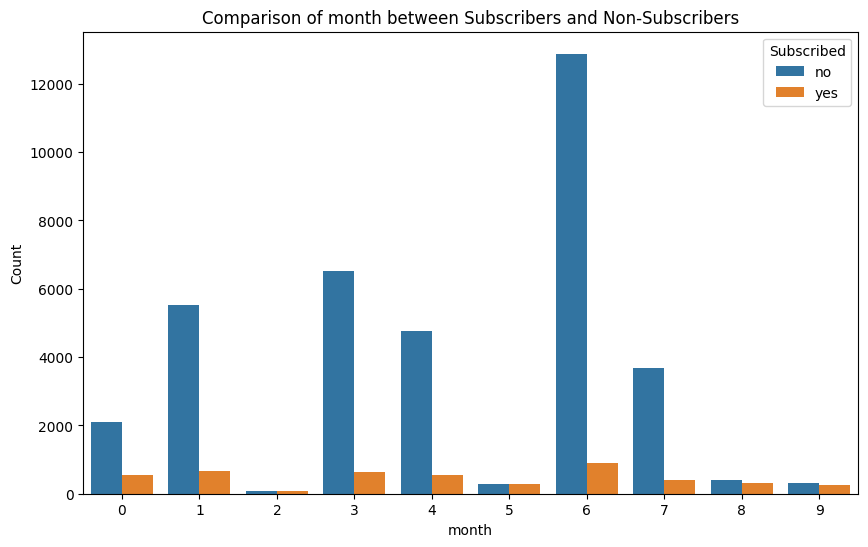


Statistics for month among Subscribers:
count    4639.000000
mean        4.191636
std         2.721698
min         0.000000
25%         1.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: month, dtype: float64

Statistics for month among Non-Subscribers:
count    36538.000000
mean         4.236110
std          2.263967
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max          9.000000
Name: month, dtype: float64



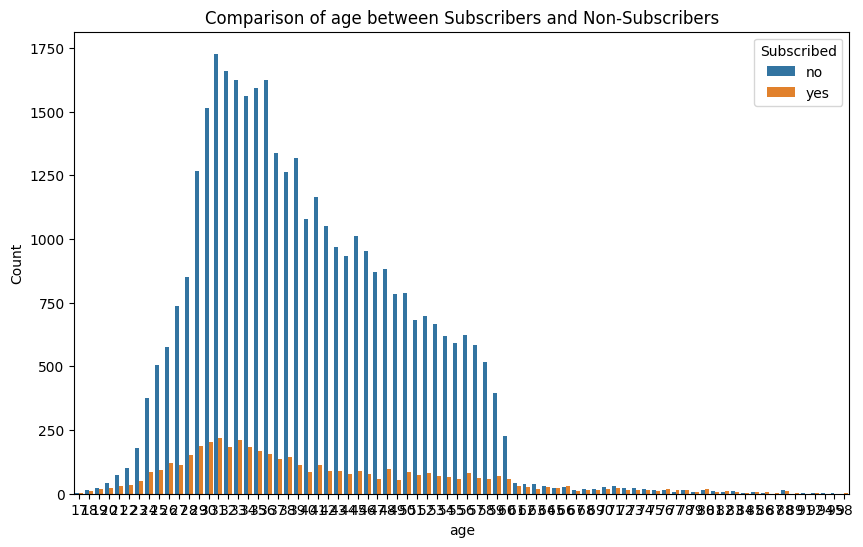


Statistics for age among Subscribers:
count    4639.000000
mean       40.912266
std        13.838838
min        17.000000
25%        31.000000
50%        37.000000
75%        50.000000
max        98.000000
Name: age, dtype: float64

Statistics for age among Non-Subscribers:
count    36538.000000
mean        39.911024
std          9.898336
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         95.000000
Name: age, dtype: float64



In [74]:
def feature_importance_analysis(data, model):
    if isinstance(model, RandomForestClassifier):
        X = data.drop(columns=['Subscribed'])  # Extract features from the data
        y = data['Subscribed']

        # Feature importance
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

        # Visualization - Feature Importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance)
        plt.title('Feature Importance')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()

        # Print top features
        top_features = feature_importance['Feature'][:4]
        print("Top Features:")
        print(top_features)

        # Comparison of top feature values between subscribers and non-subscribers
        for feature in top_features:
            # Visualize the counts of each attribute value for subscribers and non-subscribers
            plt.figure(figsize=(10, 6))
            sns.countplot(x=feature, hue='Subscribed', data=data)
            plt.title(f'Comparison of {feature} between Subscribers and Non-Subscribers')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend(title='Subscribed', loc='upper right')
            plt.show()

            # Non-visual data analysis - Statistics
            subscribed_stats = data[data['Subscribed'] == 'yes'][feature].describe()
            non_subscribed_stats = data[data['Subscribed'] == 'no'][feature].describe()

            print(f"\nStatistics for {feature} among Subscribers:\n{subscribed_stats}")
            print(f"\nStatistics for {feature} among Non-Subscribers:\n{non_subscribed_stats}\n")
    else:
        raise ValueError("Model type not supported for feature importance analysis. Please provide a RandomForestClassifier model.")

# Call the function with the RandomForestClassifier model
feature_importance_analysis(combined_data, rf_model)



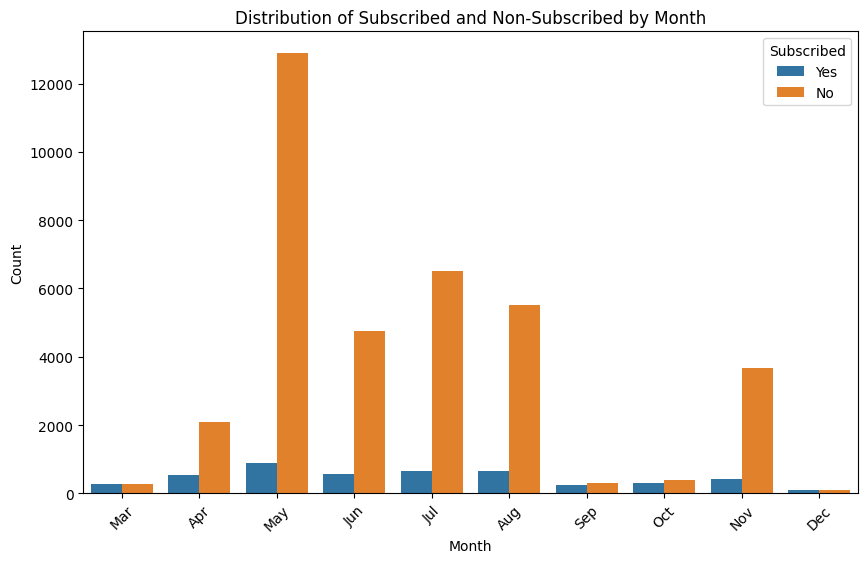

In [75]:
# Read the CSV file
data = pd.read_csv('data.csv')

# Define the order of months and capitalize them
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['month'] = data['month'].str.capitalize()  # Capitalize month names

# Count the occurrences of each month for 'yes' and 'no' values
yes_counts = data.loc[data['Subscribed'] == 'yes', 'month'].value_counts().reindex(month_order).fillna(0)
no_counts = data.loc[data['Subscribed'] == 'no', 'month'].value_counts().reindex(month_order).fillna(0)

# Filter out months with no entries for both 'yes' and 'no'
valid_months = yes_counts[yes_counts > 0].index.intersection(no_counts[no_counts > 0].index)
yes_counts = yes_counts.loc[valid_months]
no_counts = no_counts.loc[valid_months]

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Month': valid_months,
                          'Yes': yes_counts.values,
                          'No': no_counts.values})

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='value', hue='variable', data=pd.melt(plot_data, id_vars='Month'))
plt.title('Distribution of Subscribed and Non-Subscribed by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed', loc='upper right')
plt.show()

In [76]:
# Define the order of months and capitalize them
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
data['month'] = data['month'].str.capitalize()  # Capitalize month names

# Count the occurrences of each month for 'yes' and 'no' values
yes_counts = data.loc[data['Subscribed'] == 'yes', 'month'].value_counts().reindex(month_order).fillna(0)
no_counts = data.loc[data['Subscribed'] == 'no', 'month'].value_counts().reindex(month_order).fillna(0)

# Filter out months with no entries for both 'yes' and 'no'
valid_months = yes_counts[yes_counts > 0].index.intersection(no_counts[no_counts > 0].index)
yes_counts = yes_counts.loc[valid_months]
no_counts = no_counts.loc[valid_months]

# Print statistical information
print("Statistical Information for Subscribed (Yes):")
print(yes_counts.describe())

print("\nStatistical Information for Non-Subscribed (No):")
print(no_counts.describe())


Statistical Information for Subscribed (Yes):
count     10.000000
mean     464.000000
std      237.388102
min       89.000000
25%      285.750000
50%      477.500000
75%      626.500000
max      886.000000
Name: count, dtype: float64

Statistical Information for Non-Subscribed (No):
count       10.000000
mean      3654.800000
std       4033.549878
min         93.000000
25%        336.250000
50%       2889.000000
75%       5332.000000
max      12883.000000
Name: count, dtype: float64


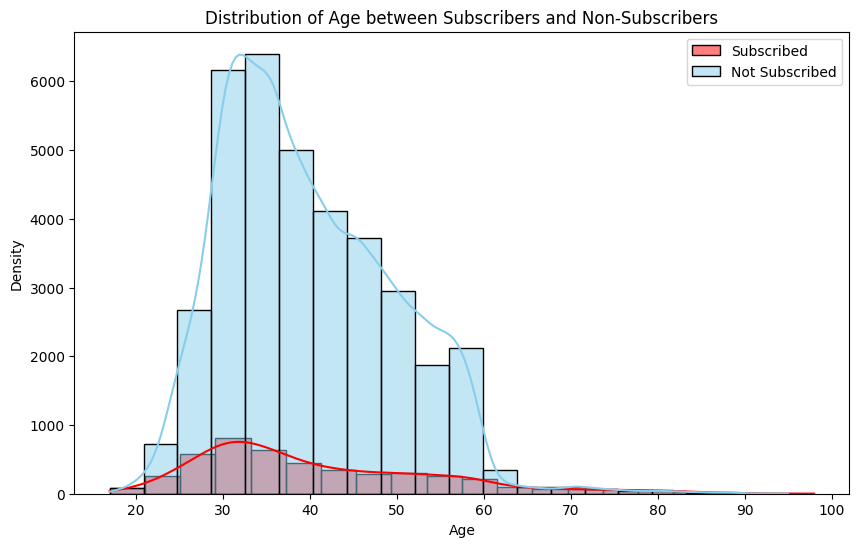

In [88]:

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram for subscribers
sns.histplot(data=data[data['Subscribed'] == 'yes'], x='age', bins=20, kde=True, color='red', label='Subscribed')

# Plot histogram for non-subscribers
sns.histplot(data=data[data['Subscribed'] == 'no'], x='age', bins=20, kde=True, color='skyblue', label='Not Subscribed')

# Add labels and title
plt.title('Distribution of Age between Subscribers and Non-Subscribers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()




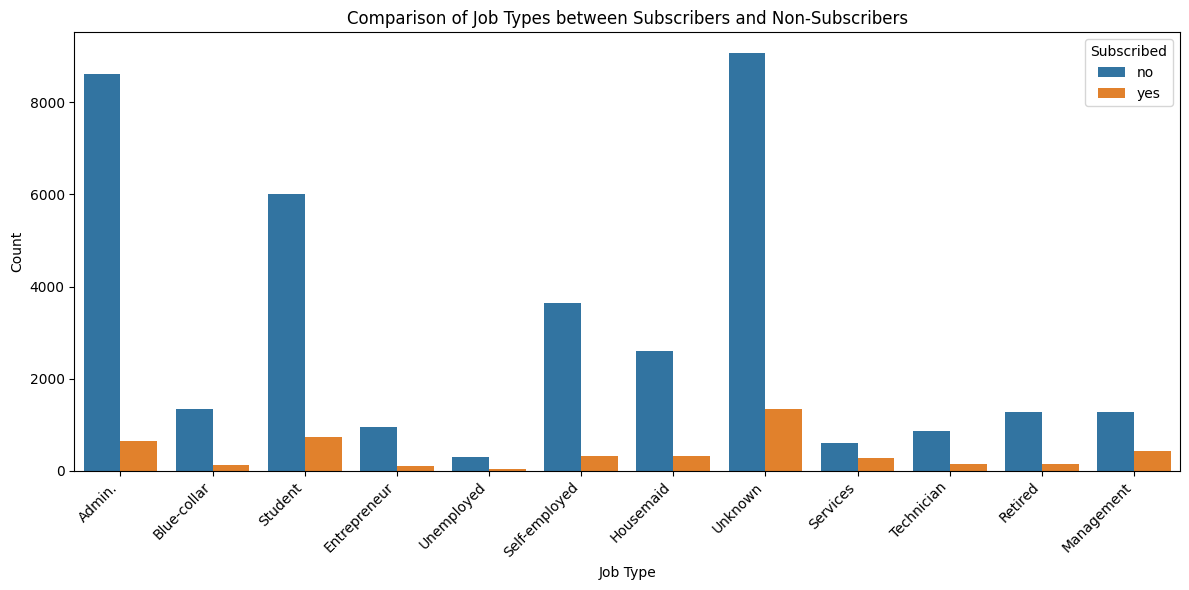

Statistical Data:
Job Counts:
job
Unknown          10419
Admin.            9252
Student           6739
Self-employed     3968
Housemaid         2924
Management        1719
Blue-collar       1456
Retired           1421
Entrepreneur      1060
Technician        1014
Services           875
Unemployed         330
Name: count, dtype: int64

Subscription Rate by Job Type:


In [77]:
# Define a function to visualize the 'job' attribute with original categorical names
def visualize_job(data):
    # Create a mapping dictionary from the dataset itself
    job_map = dict(zip(data['job'].unique(), data['job'].map({0: 'Unknown', 1: 'Admin.', 2: 'Blue-collar', 3: 'Entrepreneur',
                                                               4: 'Housemaid', 5: 'Management', 6: 'Retired', 7: 'Self-employed',
                                                               8: 'Services', 9: 'Student', 10: 'Technician', 11: 'Unemployed'}).unique()))

    # Map encoded values to original categorical names
    data['job'] = data['job'].map(job_map)

    # Plot the comparison
    plt.figure(figsize=(12, 6))
    sns.countplot(x='job', hue='Subscribed', data=data)
    plt.title('Comparison of Job Types between Subscribers and Non-Subscribers')
    plt.xlabel('Job Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-labels for better readability
    plt.legend(title='Subscribed', loc='upper right')
    plt.tight_layout()
    plt.show()

    # Print statistical data
    print("Statistical Data:")
    job_counts = data['job'].value_counts()
    print("Job Counts:")
    print(job_counts)
    print("\nSubscription Rate by Job Type:")

combined_data = pd.concat([train_data, test_data], ignore_index=True)
visualize_job(combined_data)



In [78]:
# Count the occurrences of each job for 'yes' and 'no' values
yes_counts_job = data.loc[data['Subscribed'] == 'yes', 'job'].value_counts()
no_counts_job = data.loc[data['Subscribed'] == 'no', 'job'].value_counts()

# Filter out jobs with no entries for both 'yes' and 'no'
valid_jobs = yes_counts_job.index.intersection(no_counts_job.index)
yes_counts_job = yes_counts_job.loc[valid_jobs]
no_counts_job = no_counts_job.loc[valid_jobs]

# Print statistical information
print("Statistical Information for Subscribed (Yes) by Job:")
print(yes_counts_job.describe())

print("\nStatistical Information for Non-Subscribed (No) by Job:")
print(no_counts_job.describe())


Statistical Information for Subscribed (Yes) by Job:
count      12.000000
mean      386.666667
std       371.792546
min        37.000000
25%       139.000000
50%       299.000000
75%       485.000000
max      1352.000000
Name: count, dtype: float64

Statistical Information for Non-Subscribed (No) by Job:
count      12.000000
mean     3045.666667
std      3141.147744
min       293.000000
25%       933.000000
50%      1309.000000
75%      4237.750000
max      9070.000000
Name: count, dtype: float64


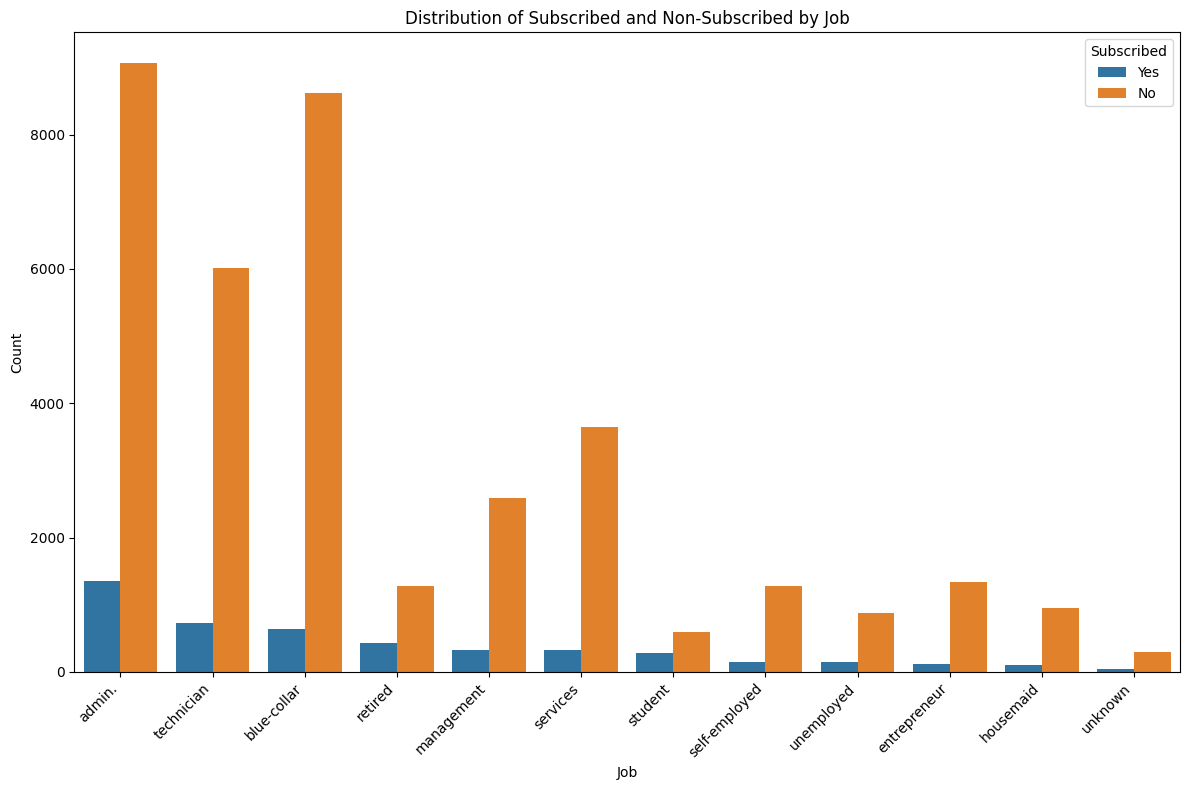

In [79]:
# Count the occurrences of each job for 'yes' and 'no' values
yes_counts_job = data.loc[data['Subscribed'] == 'yes', 'job'].value_counts()
no_counts_job = data.loc[data['Subscribed'] == 'no', 'job'].value_counts()

# Filter out jobs with no entries for both 'yes' and 'no'
valid_jobs = yes_counts_job.index.intersection(no_counts_job.index)
yes_counts_job = yes_counts_job.loc[valid_jobs]
no_counts_job = no_counts_job.loc[valid_jobs]

# Create a DataFrame for plotting
plot_data_job = pd.DataFrame({'Job': valid_jobs,
                              'Yes': yes_counts_job.values,
                              'No': no_counts_job.values})

# Plot the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Job', y='value', hue='variable', data=pd.melt(plot_data_job, id_vars='Job'))
plt.title('Distribution of Subscribed and Non-Subscribed by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subscribed', loc='upper right')
plt.tight_layout()
plt.show()


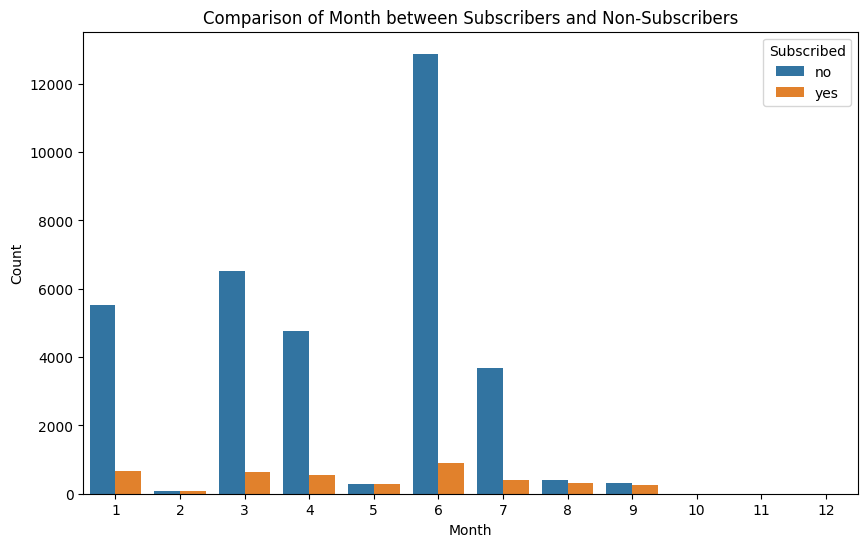


Statistics for Month among Subscribers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: month, dtype: float64

Statistics for Month among Non-Subscribers:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: month, dtype: float64


In [80]:
# Define features and target variable
features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'nr.employed']
target = 'Subscribed'

# Function for feature importance analysis and comparison
def feature_importance_analysis(data):
    X = pd.get_dummies(data[features], drop_first=True)  # Convert categorical variables into dummy/indicator variables
    y = data[target]

    # Model training
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest Classifier
    model.fit(X, y)

    # Feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Comparison of month between subscribers and non-subscribers
    plt.figure(figsize=(10, 6))
    sns.countplot(x='month', hue=target, data=data, order=range(1, 13))  # Assuming months are represented by integers from 1 to 12
    plt.title('Comparison of Month between Subscribers and Non-Subscribers')
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.legend(title='Subscribed', loc='upper right')
    plt.show()

    # Non-visual data analysis - Statistics
    subscribed_stats = data[data[target] == 1]['month'].describe()
    non_subscribed_stats = data[data[target] == 0]['month'].describe()

    print("\nStatistics for Month among Subscribers:")
    print(subscribed_stats)
    print("\nStatistics for Month among Non-Subscribers:")
    print(non_subscribed_stats)

# Assuming combined_data is the combined and preprocessed dataset
feature_importance_analysis(combined_data)


In [81]:
from scipy.stats import ttest_ind

# Define features and target variable
features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'nr.employed']
target = 'Subscribed'

# Function for feature importance analysis and comparison
def feature_importance_analysis(data):
    X = pd.get_dummies(data[features], drop_first=True)  # Convert categorical variables into dummy/indicator variables
    y = data[target]

    # Model training
    model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest Classifier
    model.fit(X, y)

    # Feature importance
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    return feature_importance  # Return the feature importance DataFrame

# Assuming combined_data is the combined and preprocessed dataset
feature_importance = feature_importance_analysis(combined_data)

if feature_importance is not None:
    # Extract top features
    top_features = feature_importance['Feature'][:6]

    for feature in top_features:
        subscribed_data = combined_data.loc[combined_data[target] == 1, feature]
        non_subscribed_data = combined_data.loc[combined_data[target] == 0, feature]

        t_statistic, p_value = ttest_ind(subscribed_data, non_subscribed_data)
        print(f"T-test result for {feature}: T-statistic = {t_statistic}, p-value = {p_value}")
else:
    print("Feature importance analysis did not return any results.")




T-test result for duration: T-statistic = nan, p-value = nan
T-test result for nr.employed: T-statistic = nan, p-value = nan
T-test result for month: T-statistic = nan, p-value = nan
T-test result for day_of_week: T-statistic = nan, p-value = nan
T-test result for campaign: T-statistic = nan, p-value = nan
T-test result for education: T-statistic = nan, p-value = nan


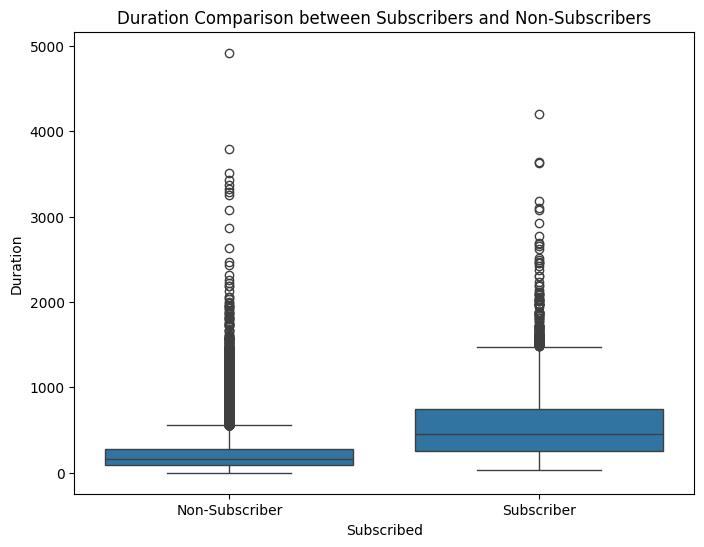

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Duration
plt.figure(figsize=(8, 6))
sns.boxplot(x='Subscribed', y='duration', data=combined_data)
plt.title('Duration Comparison between Subscribers and Non-Subscribers')
plt.xlabel('Subscribed')
plt.ylabel('Duration')
plt.xticks([0, 1], ['Non-Subscriber', 'Subscriber'])
plt.show()


In [83]:
import pandas as pd

# Read data from CSV file
df = pd.read_csv('data.csv')

# Filter subscribers and non-subscribers based on the 'subscribed' attribute
subscribed = df[df['Subscribed'] == 'yes']
not_subscribed = df[df['Subscribed'] == 'no']

# Calculate statistics for subscribers and non-subscribers based on education
subscribed_education_counts = subscribed['education'].value_counts()
not_subscribed_education_counts = not_subscribed['education'].value_counts()

# Calculate total counts for each education level
total_counts = df['education'].value_counts()

# Calculate conversion rates
conversion_rates = subscribed_education_counts / total_counts

# Calculate percentage breakdown
total_subscribers = subscribed_education_counts.sum()
total_non_subscribers = not_subscribed_education_counts.sum()
percentage_subscribers = (subscribed_education_counts / total_subscribers) * 100
percentage_non_subscribers = (not_subscribed_education_counts / total_non_subscribers) * 100

# Print out the statistics
print("Subscribed by Education:")
print(subscribed_education_counts)
print("\nNot Subscribed by Education:")
print(not_subscribed_education_counts)
print("\nConversion Rates by Education:")
print(conversion_rates)
print("\nPercentage Breakdown of Subscribers by Education:")
print(percentage_subscribers)
print("\nPercentage Breakdown of Non-Subscribers by Education:")
print(percentage_non_subscribers)
print("\nTotal Subscribers:", total_subscribers)
print("Total Non-Subscribers:", total_non_subscribers)




Subscribed by Education:
education
university.degree      1670
high.school            1031
professional.course     595
basic.9y                473
basic.4y                428
unknown                 251
basic.6y                188
illiterate                4
Name: count, dtype: int64

Not Subscribed by Education:
education
university.degree      10498
high.school             8484
basic.9y                5572
professional.course     4648
basic.4y                3748
basic.6y                2104
unknown                 1480
illiterate                14
Name: count, dtype: int64

Conversion Rates by Education:
education
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
high.school            0.108355
illiterate             0.222222
professional.course    0.113485
university.degree      0.137245
unknown                0.145003
Name: count, dtype: float64

Percentage Breakdown of Subscribers by Education:
education
university.degree      35.9913